## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\Users\Dick\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Dick\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Dick\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Dick\Anaconda3

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 11s 230us/step - loss: 2.2619 - acc: 0.1549 - val_loss: 2.2077 - val_acc: 0.2067
Epoch 2/500
50000/50000 [==============================] - 6s 129us/step - loss: 2.1752 - acc: 0.2230 - val_loss: 2.1467 - val_acc: 0.2439
Epoch 3/500
50000/50000 [==============================] - 6s 118us/step - loss: 2.1198 - acc: 0.2583 - val_loss: 2.0968 - val_acc: 0.2748
Epoch 4/500
50000/50000 [==============================] - 7s 145us/step - loss: 2.0742 - acc: 0.2806 - val_loss: 2.0566 - val_acc: 0.2875
Epoch 5/500
50000/50000 [==============================] - 6s 125us/step - loss: 2.0371 - acc: 0.2958 - val_loss: 2.0228 - val_acc: 0.3009
Epoch 6/500
50000/50000 [==============================] - 6s 125us/step - loss: 2.0063 - acc: 0.3052 - val_loss: 1.9951 - val_acc: 0.3075
Epoch 7/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.9801 - acc: 0.3150 - val_loss: 1

50000/50000 [==============================] - 7s 138us/step - loss: 1.6474 - acc: 0.4266 - val_loss: 1.6576 - val_acc: 0.4196
Epoch 60/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.6444 - acc: 0.4271 - val_loss: 1.6556 - val_acc: 0.4228
Epoch 61/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.6412 - acc: 0.4288 - val_loss: 1.6537 - val_acc: 0.4250
Epoch 62/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.6386 - acc: 0.4294 - val_loss: 1.6497 - val_acc: 0.4251
Epoch 63/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.6353 - acc: 0.4315 - val_loss: 1.6466 - val_acc: 0.4271
Epoch 64/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.6325 - acc: 0.4308 - val_loss: 1.6442 - val_acc: 0.4271
Epoch 65/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.6295 - acc: 0.4327 - val_loss: 1.6453 - val_acc: 0.4295
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 6s 127us/step - loss: 1.5104 - acc: 0.4746 - val_loss: 1.5411 - val_acc: 0.4605
Epoch 118/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.5084 - acc: 0.4746 - val_loss: 1.5394 - val_acc: 0.4598
Epoch 119/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.5066 - acc: 0.4755 - val_loss: 1.5367 - val_acc: 0.4609
Epoch 120/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.5046 - acc: 0.4765 - val_loss: 1.5368 - val_acc: 0.4634
Epoch 121/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.5031 - acc: 0.4760 - val_loss: 1.5338 - val_acc: 0.4627
Epoch 122/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.5012 - acc: 0.4768 - val_loss: 1.5337 - val_acc: 0.4609
Epoch 123/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.4993 - acc: 0.4781 - val_loss: 1.5382 - val_acc: 0.4580
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 6s 122us/step - loss: 1.4147 - acc: 0.5052 - val_loss: 1.4718 - val_acc: 0.4840
Epoch 176/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.4135 - acc: 0.5056 - val_loss: 1.4759 - val_acc: 0.4807
Epoch 177/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.4115 - acc: 0.5063 - val_loss: 1.4694 - val_acc: 0.4857
Epoch 178/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.4099 - acc: 0.5065 - val_loss: 1.4719 - val_acc: 0.4822
Epoch 179/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.4087 - acc: 0.5076 - val_loss: 1.4704 - val_acc: 0.4840
Epoch 180/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.4073 - acc: 0.5074 - val_loss: 1.4694 - val_acc: 0.4806
Epoch 181/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.4060 - acc: 0.5079 - val_loss: 1.4643 - val_acc: 0.4862
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 7s 134us/step - loss: 1.3355 - acc: 0.5328 - val_loss: 1.4195 - val_acc: 0.5033s: 1.3358 - acc: 0
Epoch 233/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.3343 - acc: 0.5316 - val_loss: 1.4284 - val_acc: 0.4945
Epoch 234/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.3330 - acc: 0.5343 - val_loss: 1.4243 - val_acc: 0.4986
Epoch 235/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.3322 - acc: 0.5332 - val_loss: 1.4225 - val_acc: 0.4984
Epoch 236/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.3306 - acc: 0.5335 - val_loss: 1.4263 - val_acc: 0.4981
Epoch 237/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.3286 - acc: 0.5364 - val_loss: 1.4255 - val_acc: 0.5005
Epoch 238/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.3283 - acc: 0.5353 - val_loss: 1.4286 - val_acc: 0.4990
Epoch 239

50000/50000 [==============================] - 6s 129us/step - loss: 1.2659 - acc: 0.5578 - val_loss: 1.3907 - val_acc: 0.5062
Epoch 290/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.2645 - acc: 0.5582 - val_loss: 1.3878 - val_acc: 0.5108
Epoch 291/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.2632 - acc: 0.5577 - val_loss: 1.3915 - val_acc: 0.5086
Epoch 292/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.2615 - acc: 0.5594 - val_loss: 1.3932 - val_acc: 0.5059
Epoch 293/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.2605 - acc: 0.5603 - val_loss: 1.4065 - val_acc: 0.5021
Epoch 294/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.2592 - acc: 0.5600 - val_loss: 1.3895 - val_acc: 0.5124
Epoch 295/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.2581 - acc: 0.5617 - val_loss: 1.3880 - val_acc: 0.5100
Epoch 296/500
50000/50000 [

50000/50000 [==============================] - 7s 141us/step - loss: 1.1992 - acc: 0.5816 - val_loss: 1.3672 - val_acc: 0.5164
Epoch 348/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.1981 - acc: 0.5827 - val_loss: 1.3631 - val_acc: 0.5191
Epoch 349/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.1969 - acc: 0.5836 - val_loss: 1.3633 - val_acc: 0.5217
Epoch 350/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.1953 - acc: 0.5826 - val_loss: 1.3666 - val_acc: 0.5206
Epoch 351/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.1944 - acc: 0.5824 - val_loss: 1.3726 - val_acc: 0.5172
Epoch 352/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.1930 - acc: 0.5845 - val_loss: 1.4032 - val_acc: 0.5046
Epoch 353/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.1918 - acc: 0.5833 - val_loss: 1.3576 - val_acc: 0.5200
Epoch 354/500
50000/50000 [

50000/50000 [==============================] - 8s 153us/step - loss: 1.1343 - acc: 0.6055 - val_loss: 1.3533 - val_acc: 0.5248
Epoch 406/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.1342 - acc: 0.6046 - val_loss: 1.3606 - val_acc: 0.5198
Epoch 407/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.1330 - acc: 0.6049 - val_loss: 1.3456 - val_acc: 0.5255
Epoch 408/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.1317 - acc: 0.6057 - val_loss: 1.3659 - val_acc: 0.5189
Epoch 409/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.1306 - acc: 0.6061 - val_loss: 1.3612 - val_acc: 0.5226
Epoch 410/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.1295 - acc: 0.6083 - val_loss: 1.3390 - val_acc: 0.5274
Epoch 411/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.1296 - acc: 0.6068 - val_loss: 1.3747 - val_acc: 0.5168
Epoch 412/500
50000/50000 [

50000/50000 [==============================] - 6s 119us/step - loss: 1.0744 - acc: 0.6271 - val_loss: 1.3485 - val_acc: 0.5262
Epoch 464/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.0729 - acc: 0.6267 - val_loss: 1.3570 - val_acc: 0.5232
Epoch 465/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.0722 - acc: 0.6267 - val_loss: 1.3468 - val_acc: 0.5272
Epoch 466/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.0712 - acc: 0.6270 - val_loss: 1.3407 - val_acc: 0.5303
Epoch 467/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.0679 - acc: 0.6283 - val_loss: 1.3788 - val_acc: 0.5162
Epoch 468/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.0721 - acc: 0.6268 - val_loss: 1.3387 - val_acc: 0.5304
Epoch 469/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.0684 - acc: 0.6291 - val_loss: 1.3690 - val_acc: 0.5199
Epoch 470/500
50000/50000 [

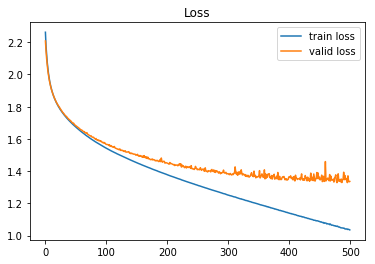

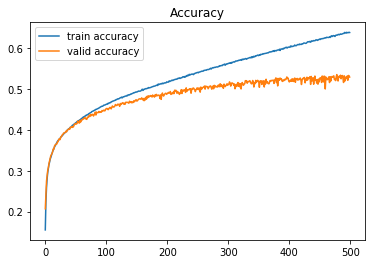

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()